In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Try to find encoding using chardet
with open("companies.csv",'rb') as rawdata:
    result=chardet.detect(rawdata.read())
result

{'encoding': 'Windows-1254',
 'confidence': 0.4610845903762258,
 'language': 'Turkish'}

In [8]:
#Reading dataset with palmos encoding, after some research
companies=pd.read_csv("companies.csv",encoding="palmos")
rounds2=pd.read_csv("rounds2.csv",encoding="palmos")

### Explore Companies dataset

In [9]:
#Read first 5 rows
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [11]:
#find unique companies in company dataset by Unique ID of company
companies.permalink=companies.permalink.str.lower()
len(companies.permalink.unique())

66368

In [12]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Explore rounds2 Dataset

In [13]:
#Read first 5 rows
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [15]:
#find unique companies in company dataset by Unique ID of company
rounds2.company_permalink=rounds2.company_permalink.str.lower()
len(rounds2.company_permalink.unique())

66368

In [16]:
#Find if there any companies in the rounds2 file which are not present in companies
companies.permalink.isin(rounds2.company_permalink).value_counts()  # As companies dataset is shorter so search permalink column in company_permalink column of rounds2

True    66368
Name: permalink, dtype: int64

In [17]:
# Crossverify by using set
len(set(companies['permalink'].unique()).difference(set(rounds2['company_permalink'].unique())))

0

### Merge the two data frames

In [18]:
#merge using left join as we want to keep all the values of both dataset
master_frame = pd.merge(left=rounds2, right=companies, how = 'inner', left_on = 'company_permalink', right_on = 'permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [19]:
# Observations in master_frame
master_frame.shape

(114949, 16)

In [20]:
#Check for missing values percentage in master_frame by columns
master_frame.isnull().sum()/len(master_frame.index)*100

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

In [21]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [22]:
# drop unnecessary columns 
master_frame=master_frame[['company_permalink','funding_round_type','raised_amount_usd','name','category_list','country_code']]

In [23]:
#Check for missing values percentage in updated master_frame by columns
master_frame.isnull().sum()/len(master_frame.index)*100

company_permalink      0.000000
funding_round_type     0.000000
raised_amount_usd     17.390321
name                   0.000870
category_list          2.966533
country_code           7.549435
dtype: float64

In [24]:
#Check the missing values by rows
master_frame.isnull().sum(axis=1).sort_values(ascending=False)

21871     3
8246      3
45088     3
88749     3
19966     3
37927     3
104482    3
104481    3
29176     3
88800     3
113072    3
113073    3
113074    3
29185     3
8091      3
113081    3
8105      3
37971     3
88890     3
104373    3
65471     3
104364    3
8151      3
113108    3
76790     3
88997     3
76775     3
88730     3
104525    3
50963     3
         ..
71565     0
71566     0
71567     0
71570     0
71572     0
71546     0
71543     0
71514     0
71525     0
71515     0
71516     0
71517     0
71518     0
71519     0
71520     0
71521     0
71522     0
71523     0
71526     0
71542     0
71527     0
71529     0
71530     0
71531     0
71532     0
71533     0
71534     0
71538     0
71541     0
0         0
Length: 114949, dtype: int64

In [25]:
#Remove rows having missing values as there are very few rows with missing values

master_frame=master_frame[master_frame.isnull().sum(axis=1)<=0]

In [26]:
master_frame.shape

(88528, 6)

In [27]:
#check the percentage of retained rows
len(master_frame.index)/114949

0.7701502405414575

In [28]:
#Double check if any column still have any null values
master_frame.isnull().sum()/len(master_frame.index)*100

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [29]:
#Check what are different funding types in dataset
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21094
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [30]:
#Remove the rows with funding type other than the required once
master_frame=master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]

In [31]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [32]:
#Conver Amount($) to million($)
master_frame.raised_amount_usd=master_frame.raised_amount_usd/1000000

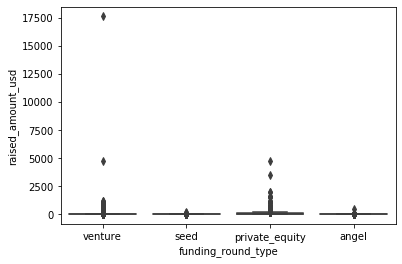

In [34]:
sns.boxplot(data=master_frame,x='funding_round_type',y='raised_amount_usd')
plt.show()

#### Many outliers in given dataset 

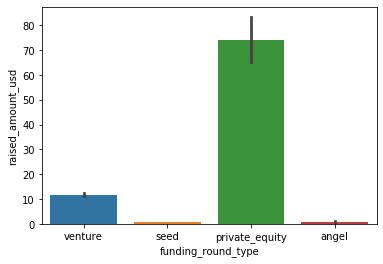

In [35]:
#Plot a barplot to check the range where average values for each funding type lies
sns.barplot(data=master_frame,x='funding_round_type',y='raised_amount_usd')
plt.show()

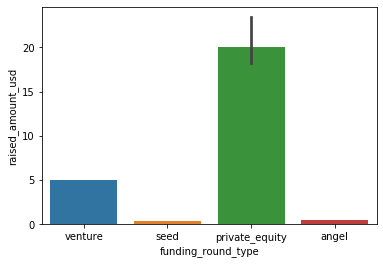

In [36]:
#Plot a barplot to check the range where median values for each funding type lies
sns.barplot(data=master_frame,x='funding_round_type',y='raised_amount_usd',estimator=np.median)
plt.savefig('Representative Investment.png',bbox_inches='tight',dpi=300)
plt.show()

### we see difference in mean and median distribution because of outliers

By using both mean and median estimator we can clearly see that only venture type is satisfying the criteria for 5-15 million $ investment

### For calculating most representative value of the investment amount use groupby function

In [37]:
# check the median value for each funding types
master_frame.groupby(by='funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,0.414906
private_equity,20.000000
seed,0.300000
venture,5.000000


In [38]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
2,/organization/-qounter,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,0.043360,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


In [39]:
#only keep venture fund type and remove other
master_frame=master_frame[master_frame['funding_round_type']=='venture']

In [40]:
master_frame.shape

(47809, 6)

In [41]:
#find top9 countries with maximum investment
top9=master_frame.groupby(by='country_code').sum().sort_values(by='raised_amount_usd',ascending=False).reset_index()
top9=top9.iloc[0:9]
top9

,country_code,raised_amount_usd
0,USA,420068.029342
1,CHN,39338.918773
2,GBR,20072.813004
3,IND,14261.508718
4,CAN,9482.217668
5,FRA,7226.851352
6,ISR,6854.350477
7,DEU,6306.921981
8,JPN,3167.647127


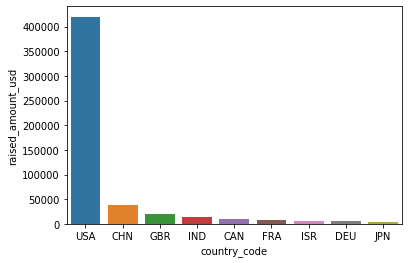

In [42]:
#Plot a bar chart that will show the countries where investment is high
sns.barplot(data=top9,x='country_code',y='raised_amount_usd',estimator=sum)
plt.savefig('Top9 Country.png',bbox_inches='tight',dpi=300)
plt.show()

In [43]:
#only keep top3 english speaking countries
master_frame=master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]

### Import mapping file

In [44]:
#Check encoding
with open("mapping.csv",'rb') as rawdata:
    result=chardet.detect(rawdata.read())
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [45]:
#Load mapping file
mapping=pd.read_csv("mapping.csv",encoding='ascii')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [46]:
#Remove any null values
mapping=mapping[~mapping.category_list.isnull()]

In [47]:
#change the format of file to merge it with master_frame
mapping=mapping.melt(id_vars=['category_list'],value_vars=['Automotive & Sports','Cleantech / Semiconductors','Entertainment',
 'Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])

In [48]:
mapping.head()

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [49]:
#only keep rows where value is 1 as 0 value implies that it is not mapped to anything
mapping=mapping[mapping.value!=0]

In [50]:
#Remove value column
mapping.drop(['value'],axis=1,inplace=True)

In [51]:
#Rename 'variable' column to 'main_sector'
mapping.rename(columns={'variable':'main_sector'},inplace=True)

In [52]:
mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [53]:
#check for any null value in category_list
master_frame['category_list'].isnull().sum()

0

In [54]:
#keep the first value before pipe operator as primary sector
master_frame.category_list=master_frame.category_list.apply(lambda x: x.split('|')[0])

In [55]:
#map the primary sector(category_list column) with main_sector
master_frame=pd.merge(master_frame,mapping,how='inner',on='category_list')

In [56]:
master_frame.shape

(36187, 7)

In [57]:
#double check for any null values
master_frame[master_frame.main_sector.isnull()]

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector


### Create 3 different dataframe for top3 countries

In [58]:
#create three separate dataframe for each country and keep investment value between 5 to 15 only
D1=master_frame[(master_frame['country_code']=='USA') & ((master_frame['raised_amount_usd']>5) & (master_frame['raised_amount_usd']<15))]
D2=master_frame[(master_frame['country_code']=='GBR') & ((master_frame['raised_amount_usd']>5) & (master_frame['raised_amount_usd']<15))]
D3=master_frame[(master_frame['country_code']=='IND') & ((master_frame['raised_amount_usd']>5) & (master_frame['raised_amount_usd']<15))]

In [59]:
#Check for the countries where highest no of investment is made in terms of count
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

9227
524
222


In [60]:
#Check for the countries where highest investment is made in terms of amount
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

82391.52454900001
4593.704358
1998.537552


In [61]:
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
25,/organization/matchmine,venture,10.0,MatchMine,Media,USA,Entertainment
28,/organization/newscorporation,venture,12.5,News Corp,Media,USA,Entertainment
29,/organization/nokeena,venture,9.4,Ankeena Networks,Media,USA,Entertainment
31,/organization/nokeena,venture,6.5,Ankeena Networks,Media,USA,Entertainment
34,/organization/plumtv,venture,5.2,PlumTV,Media,USA,Entertainment


In [62]:
#use groupby to find investment value and investment count in each sector for country 1
D1_grp=D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])

In [66]:
#sort the dataframe by count
D1_grp.sort_values(by=('raised_amount_usd','count'),ascending=False,inplace=True)

In [67]:
D1_grp

raised_amount_usd      
                                                      sum count
main_sector                                                    
Others                                       21534.280296  2400
Cleantech / Semiconductors                   17796.003033  1950
Social, Finance, Analytics, Advertising      13590.695048  1550
News, Search and Messaging                   11076.816094  1265
Health                                        6855.859357   759
Manufacturing                                 6228.553378   691
Entertainment                                 4040.212982   470
Automotive & Sports                           1269.104361   142

In [68]:
#use groupby to find investment value and investment count in each sector for country 2
D2_grp=D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D2_grp.sort_values(by=('raised_amount_usd','count'),ascending=False,inplace=True)
D2_grp

raised_amount_usd      
                                                      sum count
main_sector                                                    
Others                                        1094.124289   126
Cleantech / Semiconductors                    1096.905008   123
Social, Finance, Analytics, Advertising        756.888357    89
News, Search and Messaging                     565.746235    65
Entertainment                                  401.511059    46
Manufacturing                                  331.940335    38
Health                                         209.537510    23
Automotive & Sports                            137.051565    14

In [69]:
#use groupby to find investment value and investment count in each sector for country 3
D3_grp=D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D3_grp.sort_values(by=('raised_amount_usd','count'),ascending=False,inplace=True)
D3_grp

raised_amount_usd      
                                                      sum count
main_sector                                                    
Others                                         697.409507    77
News, Search and Messaging                     368.834545    41
Social, Finance, Analytics, Advertising        215.543500    25
Entertainment                                  200.830000    23
Manufacturing                                  165.900000    18
Health                                         157.740000    17
Cleantech / Semiconductors                     125.380000    14
Automotive & Sports                             66.900000     7

In [70]:
#Find company which received the highest investment in top sector for country 1
D1[D1['main_sector']=='Others'].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
company_permalink,
/organization/airtight-networks,54.201907
/organization/bit9,48.433533
/organization/zilliant,45.600000
/organization/redfin,44.800000
/organization/five9,44.600000


In [71]:
#Find company which received the highest investment in second top sector for country 1
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
company_permalink,
/organization/biodesix,75.300000
/organization/tigo-energy,63.739496
/organization/rheonix,56.124758
/organization/scienergy,55.375423
/organization/alung-technologies,54.110403


In [72]:
#Find company which received the highest investment in top sector for country 2
D2[D2['main_sector']=='Others'].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37.000000
/organization/enigmatic,32.500000
/organization/opencloud,27.972766
/organization/myoptique-group,27.694613
/organization/acs-clothing,26.239014


In [73]:
#Find company which received the highest investment in second top sector for country 2
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
company_permalink,
/organization/eusa-pharma,35.600000
/organization/horizon-discovery,31.353719
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h,29.132906
/organization/takeda-cambridge,22.340000
/organization/immune-targeting-systems,20.320961


In [74]:
#Find company which received the highest investment in top sector for country 3
D3[D3['main_sector']=='Others'].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
company_permalink,
/organization/myntra,33.0
/organization/firstcry-com,24.0
/organization/nxtgen-data-center-cloud-services,22.3
/organization/maharana-infrastructure-and-professional-services-private-limited-mips,21.6
/organization/india-property-online,19.0


In [75]:
#Find company which received the highest investment in second top sector for country 3
D3[D3['main_sector']=='News, Search and Messaging'].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33.0
/organization/imimobile,23.0
/organization/sms-gupshup,22.0
/organization/hike,21.0
/organization/roadrunnr,21.0


**plotting the number of investments in top 3 sectors of the top 3 countries**

In [77]:
pivot_mf = pd.pivot_table(data=master_frame, values='raised_amount_usd', index='country_code', columns='main_sector', aggfunc='count')
pivot_mf.head()

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,
GBR,44,433,133,118,122,241,507,318
IND,31,54,75,42,55,130,281,77
USA,505,7849,1756,3263,2453,4301,8243,5156


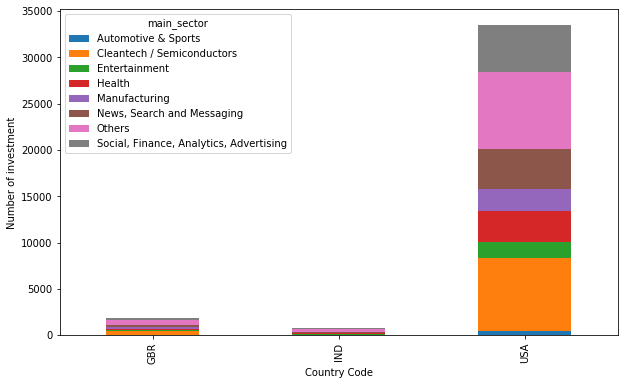

In [78]:
pivot_mf.plot(kind='bar', stacked=True, figsize=[10,6])
plt.xlabel('Country Code')
plt.ylabel('Number of investment')
plt.show()

#### This is little bit difficult to analyse so lets normalise the values

In [80]:
#find column names
pivot_group.columns

Index(['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment',
       'Health', 'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object', name='main_sector')

In [81]:
#use lambda function to normalise the data
pivot_mf_normalised = pivot_mf[['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment',
       'Health', 'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising']].apply(lambda x: x/x.sum(), axis=1)
pivot_mf_normalised.head()

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,
GBR,0.022965,0.225992,0.069415,0.061587,0.063674,0.125783,0.264614,0.165971
IND,0.041611,0.072483,0.100671,0.056376,0.073826,0.174497,0.377181,0.103356
USA,0.015063,0.234117,0.052377,0.097327,0.073167,0.128288,0.245869,0.153791


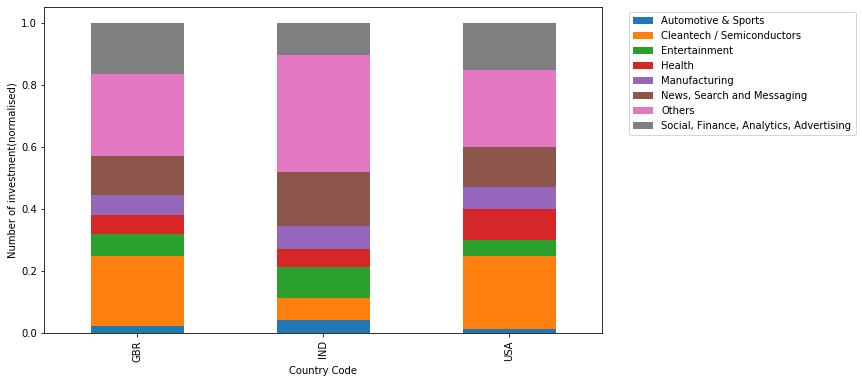

In [84]:
pivot_mf_normalised.plot(kind='bar', stacked=True, figsize=[10,6])
plt.xlabel('Country Code')
plt.ylabel('Number of investment(normalised)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('Top3 country investments.png',bbox_inches='tight',dpi=300)
plt.show()

To conclude: Best suited investment Type: **'Venture'**
            Top 3 English speaking countries: **'USA', 'GBR', 'IND'** (USA, UK, India)
            Top 2 sectors for each country: USA : **'Others' , 'Cleantech / Semiconductors'**
                                            UK:   **'Others' , 'Cleantech / Semiconductors'**
                                            IND:  **'Others', 'News, Search and Messaging'** 